In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
link_world_aggregated = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv'
world_df = pd.read_csv(link_world_aggregated)

In [3]:
world_df['Date'] = pd.to_datetime(world_df.Date)
world_df.set_index('Date', inplace = True)
world_df['Removed'] = world_df.Recovered + world_df.Deaths
world_df['Active'] = world_df.Confirmed - world_df.Removed

In [4]:
world_df.tail()

,Confirmed,Recovered,Deaths,Increase rate,Removed,Active
Date,,,,,,
2020-03-29,720117,149082,33925,8.992048,183007,537110
2020-03-30,782365,164566,37582,8.644151,202148,580217
2020-03-31,857487,178034,42107,9.601912,220141,637346
2020-04-01,932605,193177,46809,8.760249,239986,692619
2020-04-02,1013157,210263,52983,8.637312,263246,749911


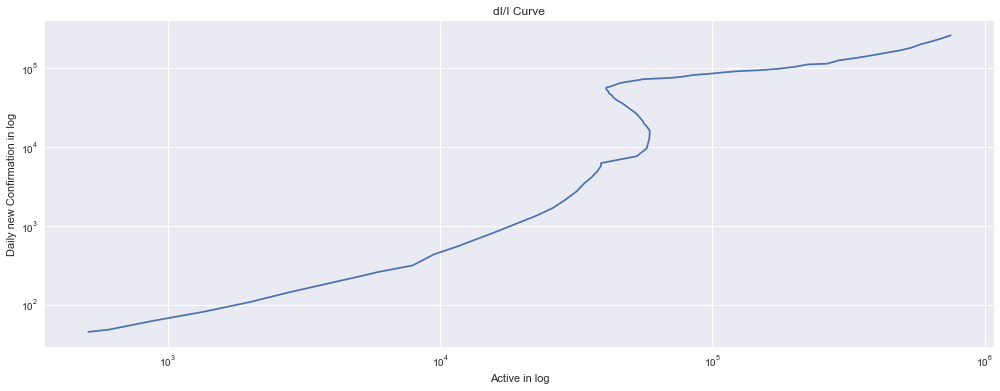

In [12]:
plt.figure(figsize = (17,6))
plt.title('dI/I Curve')
plt.xscale('log')
plt.yscale('log')

plt.plot(world_df.Active, 
        world_df.Removed)
plt.xlabel('Active in log')
plt.ylabel('Daily new Confirmation in log')
plt.show()

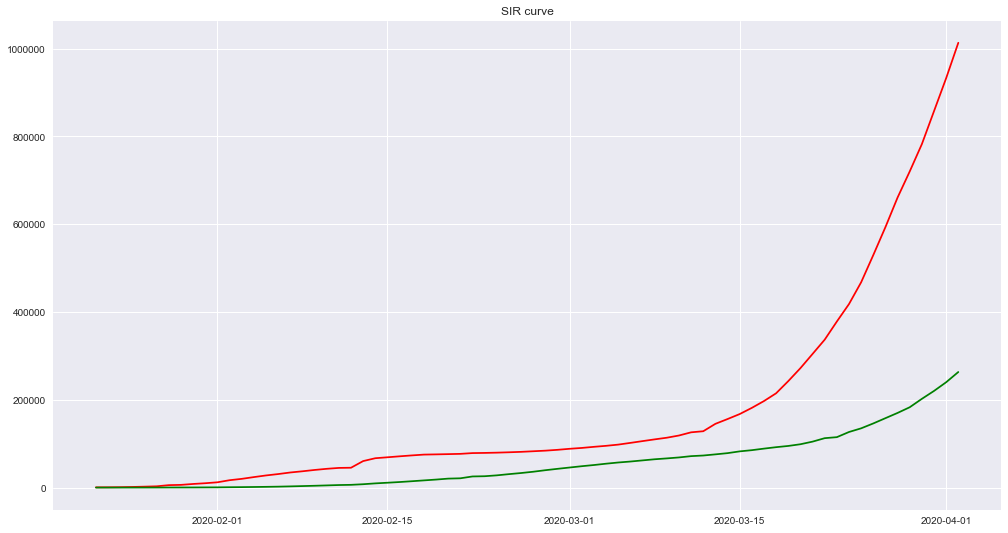

In [13]:
plt.style.use('seaborn')
plt.figure(figsize = (17, 9))
plt.title('SIR curve')

C = ['Confirmed', 'Removed', 'Active']
plt.plot(world_df.index, 
        world_df.Confirmed,
        'r')
plt.plot(world_df.index, 
        world_df.Removed,
        'g')
plt.show()

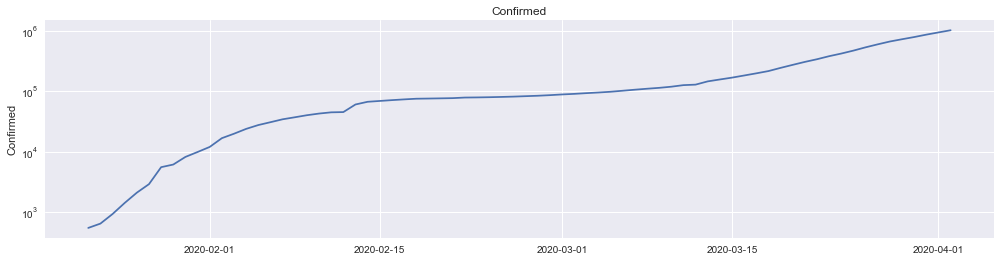

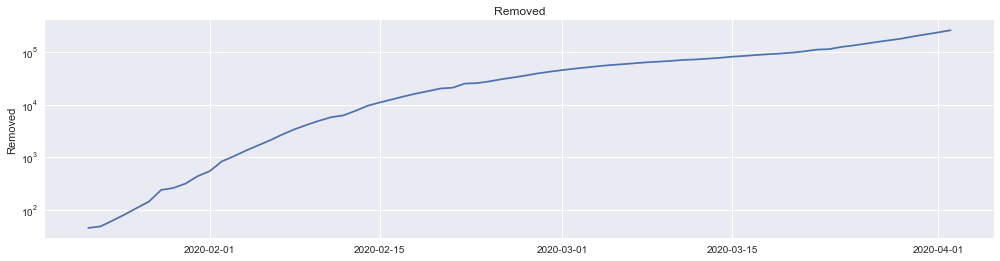

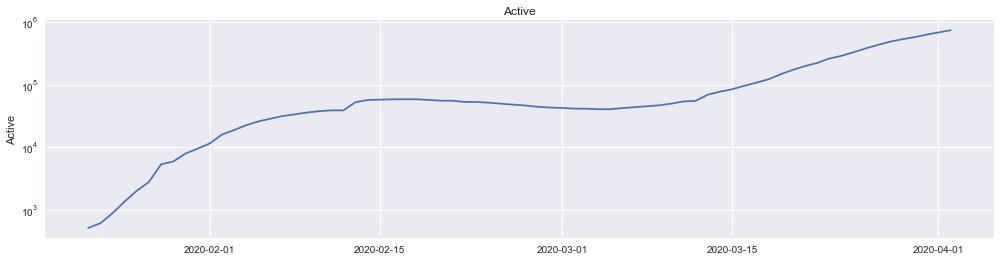

In [14]:
for c in C:
    plt.figure(figsize = (17, 4))
    plt.yscale('log')
    plt.plot(
            world_df.index,
            world_df[c],
            )
    plt.title(c)
    plt.ylabel(c)
    plt.show()

6.600740994669896


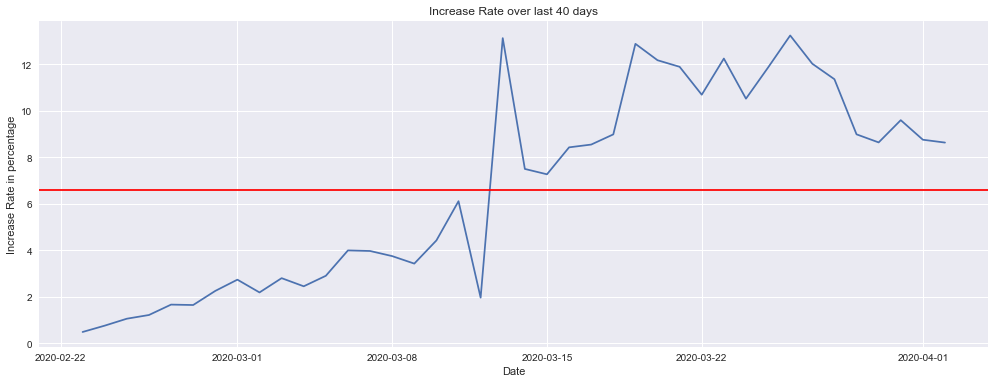

In [8]:
days = 40
avg_increase_rate = ((world_df.Confirmed[len(world_df)-1]/world_df.Confirmed[len(world_df)-1-days])**(1/days)-1)*100
print(avg_increase_rate)
plt.figure(figsize = (17, 6))
plt.title(f'Increase Rate over last {days} days')
plt.xlabel('Date')
plt.ylabel('Increase Rate in percentage')

plt.plot(world_df.tail(days).index,
        world_df.tail(days)['Increase rate'],
        )
plt.axhline(avg_increase_rate, color = 'r')
plt.show()

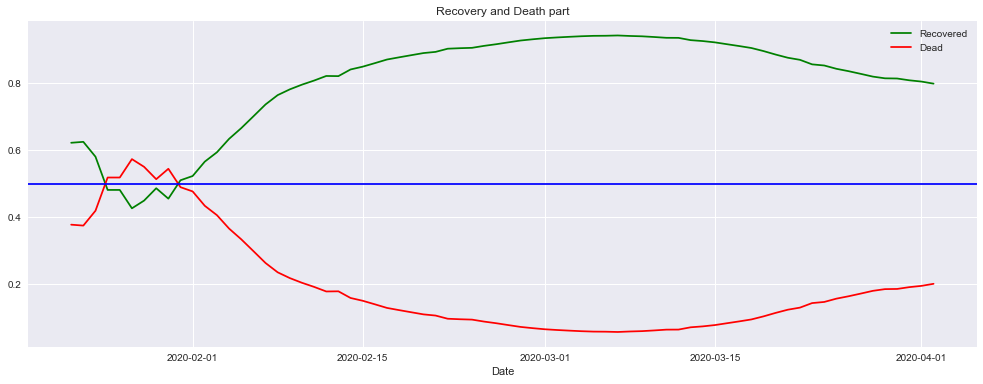

In [9]:
plt.figure(figsize = (17, 6))
plt.title(f'Recovery and Death part')
plt.xlabel('Date')

plt.plot(world_df.index, 
         world_df.Recovered/world_df.Removed, 'g')
plt.plot(world_df.index, 
        world_df.Deaths/world_df.Removed, 'r')

plt.legend(['Recovered', 'Dead'])
plt.axhline(.5, color = 'b')
plt.show()

In [10]:
removed_df = world_df[['Recovered', 'Deaths', 'Removed']]
d = 1
for c in removed_df.columns:
    L = list(removed_df[c])
    K = L[:d] + [L[i+d]-L[i] for i in range(len(L)-d)]
    removed_df[c] = K


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


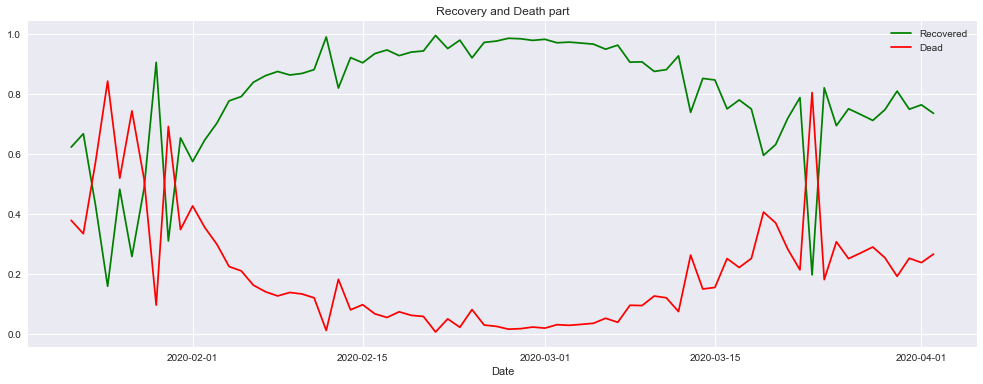

In [11]:
plt.figure(figsize = (17, 6))
plt.title(f'Recovery and Death part')
plt.xlabel('Date')

plt.plot(removed_df.index, 
         removed_df.Recovered/removed_df.Removed, 'g')
plt.plot(removed_df.index, 
        removed_df.Deaths/removed_df.Removed, 'r')

plt.legend(['Recovered', 'Dead'])
#plt.axhline(.5, color = 'b')
plt.show()